<a href="https://colab.research.google.com/github/dianachavezr/Challenge_1_Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

In [4]:
ingresos = {}

for nombre, df in tiendas.items():
    ingresos[nombre] = df['Precio'].sum()

print("Ingresos totales por tienda:")
for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:.2f}")


Ingresos totales por tienda:
Tienda 1: $1150880400.00
Tienda 2: $1116343500.00
Tienda 3: $1098019600.00
Tienda 4: $1038375700.00


# 2. Ventas por categoría

In [6]:
ventas_categoria = {}

for nombre, df in tiendas.items():
    df.columns = df.columns.str.strip()  # Elimina espacios invisibles en nombres de columnas
    ventas_categoria[nombre] = df.groupby('Categoría del Producto').size()

    print(f"\nVentas por categoría en {nombre}:")
    print(ventas_categoria[nombre].sort_values(ascending=False))  # ordenado de mayor a menor



Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Ventas por categoría en Tienda 4:
Categorí

# 3. Calificación promedio de la tienda


In [7]:
calificaciones = {}

for nombre, df in tiendas.items():
    df.columns = df.columns.str.strip()  # Limpieza por si acaso
    calificaciones[nombre] = df['Calificación'].mean()

print("\nCalificación promedio por tienda:")
for tienda, cal in calificaciones.items():
    print(f"{tienda}: {cal:.2f}")



Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [8]:
productos_vendidos = {}

for nombre, df in tiendas.items():
    df.columns = df.columns.str.strip()  # Limpieza de nombres de columnas
    conteo_productos = df['Producto'].value_counts()
    productos_vendidos[nombre] = conteo_productos

    print(f"\n{nombre} - Top 5 productos más vendidos:")
    print(conteo_productos.head(5))  # Top 5 más vendidos

    print(f"\n{nombre} - Top 5 productos menos vendidos:")
    print(conteo_productos.tail(5))  # Top 5 menos vendidos



Tienda 1 - Top 5 productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda 1 - Top 5 productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Tienda 2 - Top 5 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Tienda 2 - Top 5 productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3 - Top 5 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas    

# 5. Envío promedio por tienda

In [9]:
envio_promedio = {}

for nombre, df in tiendas.items():
    df.columns = df.columns.str.strip()  # Limpia espacios o tabulaciones
    envio_promedio[nombre] = df['Costo de envío'].mean()

print("\nCosto de envío promedio por tienda:")
for tienda, costo in envio_promedio.items():
    print(f"{tienda}: ${costo:.2f}")



Costo de envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


## ***Crear 3 visualizaciones clave y diferentes***

**1. Gráfico de barras: Ingresos por tienda**

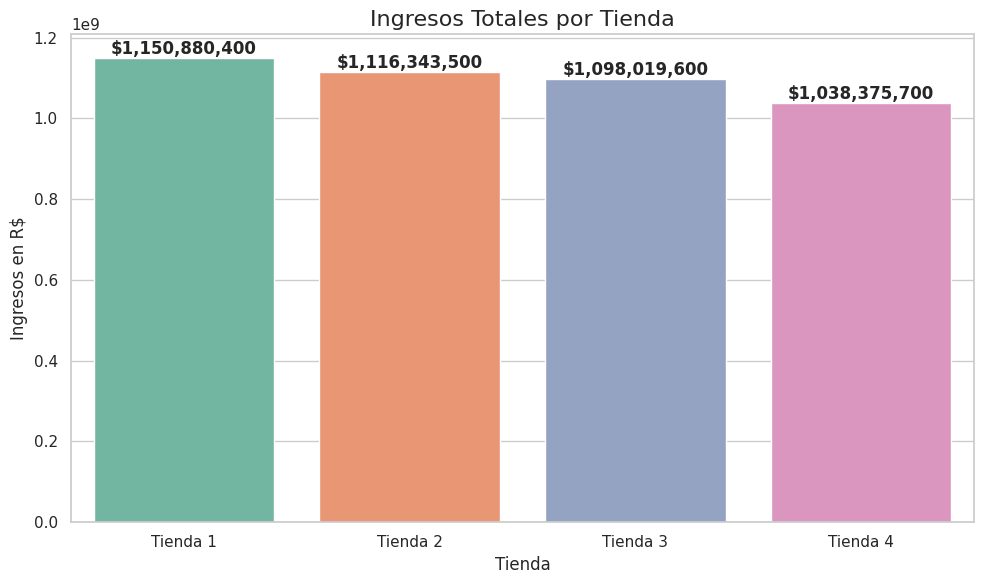

In [17]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_ingresos,
    x='Tienda',
    y='Ingresos',
    hue='Tienda',  # Para que asigne colores distintos
    palette=colors,
    legend=False    # No mostrar leyenda, porque ya están en el eje X
)

# Anotaciones en las barras
for i, valor in enumerate(df_ingresos['Ingresos']):
    barplot.text(i, valor + 500, f"${valor:,.0f}", ha='center', va='bottom', fontweight='bold')

plt.title("Ingresos Totales por Tienda", fontsize=16)
plt.ylabel("Ingresos en R$", fontsize=12)
plt.xlabel("Tienda", fontsize=12)
plt.tight_layout()
plt.show()


**2. Gráfico circular: Categorías más vendidas en Tienda 1 (o la que elijas)**

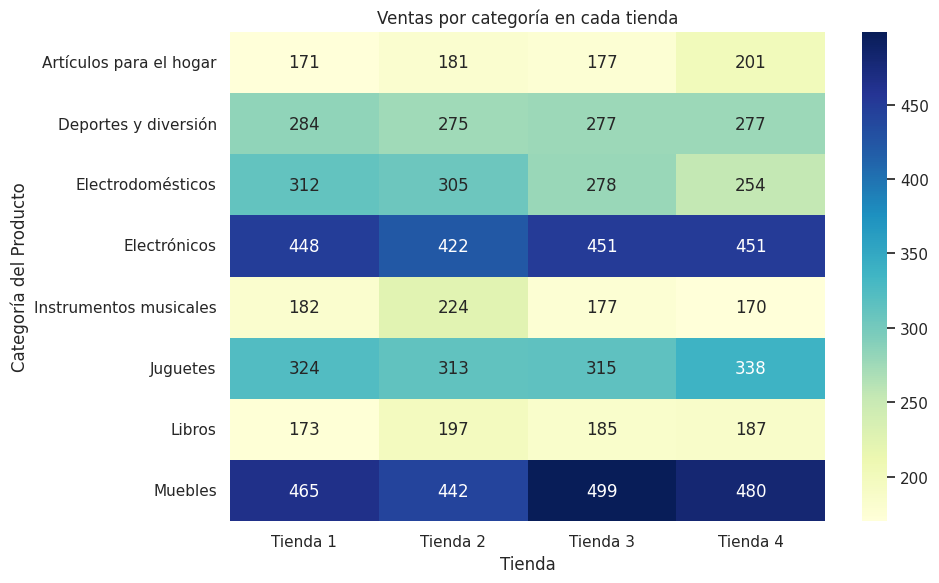

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir el diccionario ventas_categoria en un DataFrame
df_categorias = pd.DataFrame(ventas_categoria).fillna(0).astype(int)

# Reordenamos categorías si lo deseas
df_categorias = df_categorias.sort_index()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_categorias, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Ventas por categoría en cada tienda")
plt.xlabel("Tienda")
plt.ylabel("Categoría del Producto")
plt.tight_layout()
plt.show()


**3. Gráfico de dispersión: Calificación promedio vs. Costo de envío promedio**

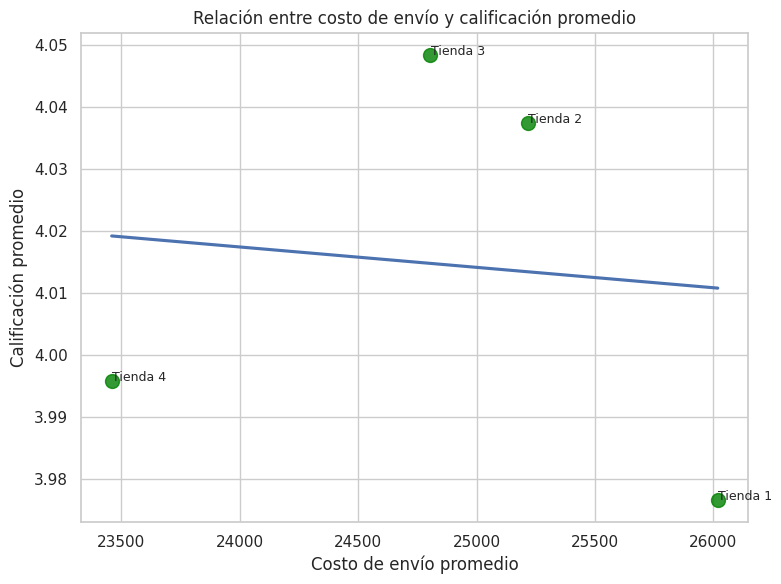

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Gráfico de dispersión con línea de regresión
sns.regplot(data=resumen, x='Costo de envío promedio', y='Calificación promedio', ci=None, scatter_kws={'s':100, 'color':'green'})

# Etiquetas con nombres de tiendas
for i in range(len(resumen)):
    plt.text(resumen['Costo de envío promedio'][i]+0.05,
             resumen['Calificación promedio'][i],
             resumen['Tienda'][i],
             fontsize=9)

plt.title("Relación entre costo de envío y calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.grid(True)
plt.tight_layout()
plt.show()


# Informe Final: Recomendación de Tienda a Vender

## Introducción  
El propósito de este análisis es ayudar al Sr. Juan a decidir cuál de sus cuatro tiendas de Alura Store debe vender, para enfocarse en un nuevo emprendimiento. Para ello, se analizaron los ingresos, la satisfacción del cliente, los costos de envío, y el desempeño en ventas de productos y categorías. El objetivo es identificar la tienda menos eficiente.

---

## Desarrollo  

### 1. Ingresos Totales por Tienda  
- La **Tienda 4** es la que menos ingresos genera, con aproximadamente **1.03 mil millones R$**, comparado con más de 1.09 mil millones R$ en las otras tiendas.  
- Esto indica que, en términos financieros, la Tienda 4 tiene un desempeño inferior.

### 2. Ventas por Categoría  
- Aunque la Tienda 4 tiene buena presencia en la categoría "Artículos para el hogar", en categorías clave como "Muebles" y "Electrónicos" queda por detrás de las otras tiendas.  
- La menor cantidad de ventas en estas categorías clave puede afectar sus ingresos generales.

### 3. Calificación Promedio y Costo de Envío  
- La Tienda 4 presenta la **calificación promedio más baja (cercana a 4.0)**, lo que puede afectar la fidelización y percepción del cliente.  
- A pesar de tener el **costo de envío promedio más bajo** (alrededor de 23,500 R$), esto no ha resultado en mejores calificaciones ni mayores ingresos.

### 4. Productos más y menos vendidos  
- La Tienda 4 tiene varios productos entre los menos vendidos, incluyendo refrigeradores y algunos instrumentos musicales.  
- Esto indica menor rotación en productos importantes y puede ser un indicativo de bajo desempeño.

---

## Conclusión y Recomendación  

La **Tienda 4** es la que presenta el menor desempeño general en ingresos, satisfacción del cliente y ventas en categorías clave.  
Aunque su costo de envío es más bajo, esto no se traduce en mayores ventas ni mejores calificaciones. Por ello, se recomienda que el Sr. Juan venda la **Tienda 4**, para que pueda enfocar sus esfuerzos y recursos en las tiendas con mejor desempeño y potencial de crecimiento.

Esta recomendación se basa en un análisis objetivo de datos financieros, operativos y de satisfacción del cliente, que reflejan la eficiencia y rentabilidad de cada tienda.
